In [1]:
%load_ext autoreload
%autoreload 2

# Txt2Img - Basic Usage

SD Pipelines Overview: https://huggingface.co/docs/diffusers/api/pipelines/stable_diffusion/overview
 
SD Pipelines Source Code: https://github.com/huggingface/diffusers/blob/main/src/diffusers/pipelines/stable_diffusion/

More links:
- https://huggingface.co/docs/diffusers/using-diffusers/loading

In [2]:
import torch
import diffusers

from src import helpers

PyTorch version: 2.0.1+cu117


In [3]:
model_id = "runwayml/stable-diffusion-v1-5"

pipe = diffusers.StableDiffusionPipeline.from_pretrained(
    model_id,
    torch_dtype=torch.float16,
    use_safetensors=True,
    # low_cpu_mem_usage=True,
).to("cuda" if torch.cuda.is_available() else "cpu")

if torch.cuda.is_available() and torch.__version__ < "2.0":
    print("Enabling Xformers memory efficient attention.")
    pipe.enable_xformers_memory_efficient_attention()

print(pipe)
print("Device:", pipe.device)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.20.2",
  "_name_or_path": "runwayml/stable-diffusion-v1-5",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

Device: cuda:0


  0%|          | 0/30 [00:00<?, ?it/s]

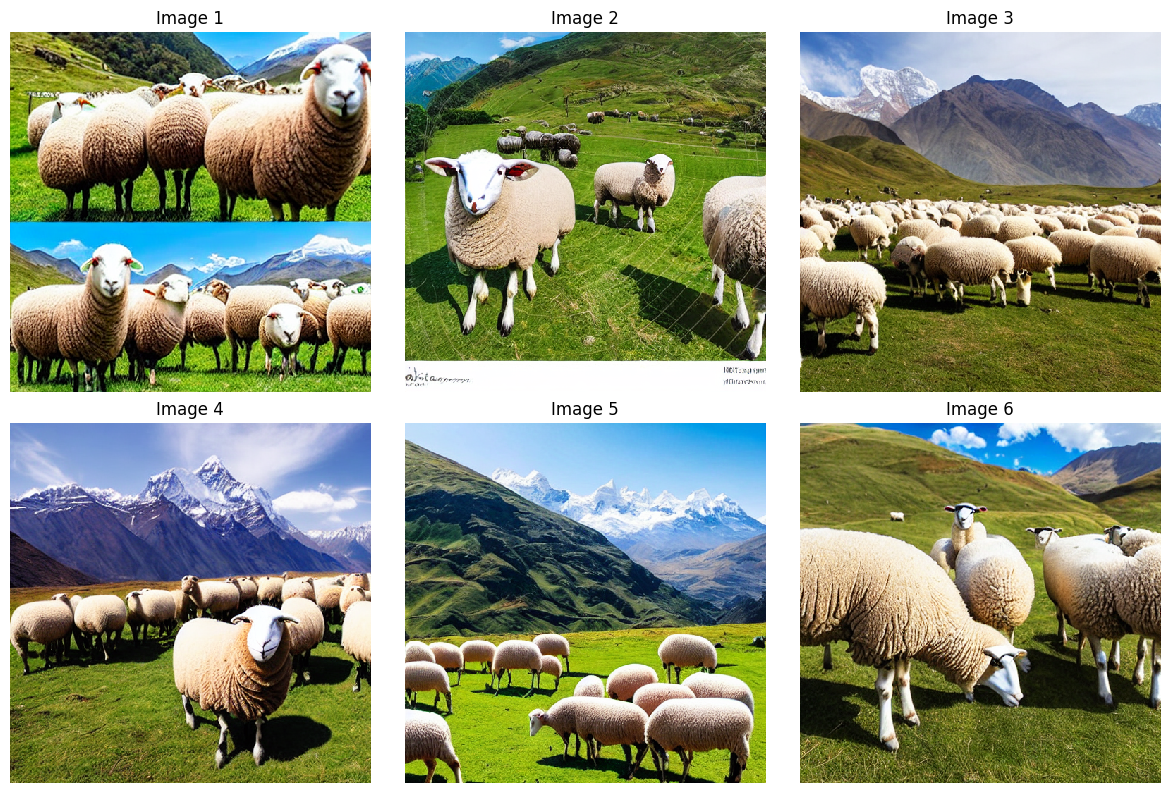

In [4]:
# == The prompt or prompts to guide the image generation. 
#    If not defined, one has to pass `prompt_embeds` instead.
prompt = "flock of sheep are having selfie with a grazing on grassland, himalayan background extra detailed, highly realistic, extra detailed, himalayn landscape, hyper realistic"

# == The prompt or prompts not to guide the image generation. 
#    If not defined, one has to pass `negative_prompt_embeds` instead.
#    Ignored when not using guidance (i.e., ignored if `guidance_scale` is less than `1`).
negative_prompt = "low-res, low quality, jpeg artifacts, blurry, grainy, distorted, ugly, out of frame, watermarked"

# == Other parameters
# == Guidance scale as defined in [Classifier-Free Diffusion Guidance](https://arxiv.org/abs/2207.12598).
#    `guidance_scale` is defined as `w` of equation 2. of [Imagen Paper](https://arxiv.org/pdf/2205.11487.pdf).
#    Guidance scale is enabled by setting `guidance_scale > 1`.
#    Higher guidance scale encourages to generate images that are closely linked to the text `prompt`, usually at the expense of lower image quality.
guidance_scale = 7.5 # Default: 7.5

# == The number of denoising steps.
#    More denoising steps usually lead to a higher quality image at the expense of slower inference.
num_inference_steps = 30  # Default: 50

# == The number of images to generate per prompt.
num_images_per_prompt = 6  # Default: 1

# ================================================================================================
seed = None

# == For deterministic results across runs, we create a torch.Generator using the seed value.
generator = None
if seed is not None:
    print(f"Using seed: {seed.value}")
    generator = torch.Generator().manual_seed(seed.value)

out = pipe(
    prompt=prompt,
    negative_prompt=negative_prompt,
    guidance_scale=guidance_scale,
    num_inference_steps=num_inference_steps,
    num_images_per_prompt=num_images_per_prompt,
    generator=generator,
)
helpers.plot(out.images)